In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [9]:
X = torch.linspace(0,45,100)
Y = 4.434*X + 3.14

In [11]:
X_train, Y_train, X_test, Y_test = X[:80], Y[:80], X[80:], Y[80:]

In [56]:
class lin_model(nn.Module):
  def __init__(self):
     super().__init__()
     self.w = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
     self.b = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)

  def forward(self, X: torch.Tensor):
      return self.w*X + self.b


In [61]:
torch.manual_seed(42)
mod0 = lin_model()

In [64]:
mod0.state_dict()

OrderedDict([('w', tensor([0.3367])), ('b', tensor([0.1288]))])

In [89]:
with torch.inference_mode(): 
  print(mod0(X_test))
  y_preds = mod0(X_test)

tensor([12.3721, 12.5251, 12.6782, 12.8312, 12.9843, 13.1373, 13.2903, 13.4434,
        13.5964, 13.7495, 13.9025, 14.0555, 14.2086, 14.3616, 14.5147, 14.6677,
        14.8208, 14.9738, 15.1268, 15.2799])


<generator object Module.parameters at 0x7f9656d386d0>

In [90]:
def plot_predictions(train_data=X_train, 
                     train_labels=Y_train, 
                     test_data=X_test, 
                     test_labels=Y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, color="g", marker = '.', s=6, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

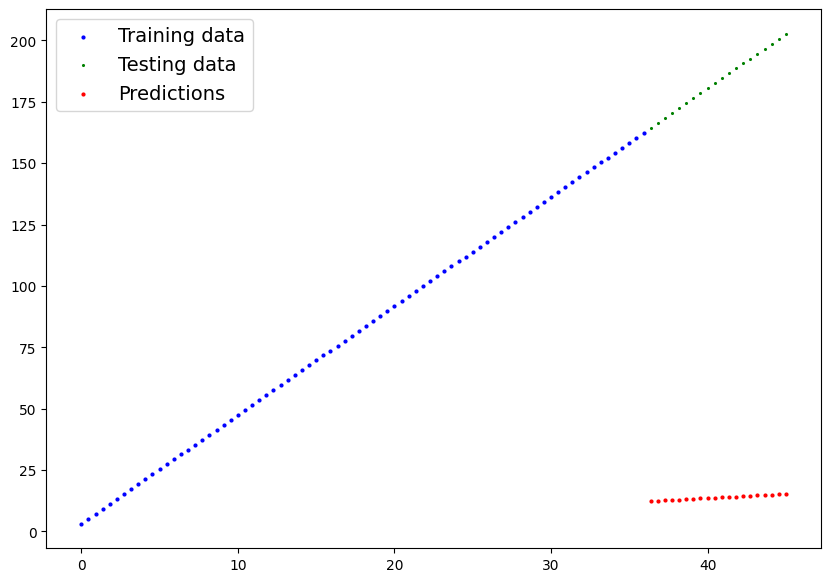

In [91]:
plot_predictions(predictions = y_preds)

In [92]:
# train

In [102]:
loss = nn.L1Loss()
lr = 0.01
optm = torch.optim.SGD(params = mod0.parameters(), lr = lr)

num_epochs = 150
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(num_epochs):
    mod0.train()
  # forward
    y_pred = mod0(X_train)
  # loss
    loss_exp = loss(y_pred, Y_train)
  # optimizer zero grad
    optm.zero_grad()
  # backward
    loss_exp.backward()
  #update
    optm.step()

lin_model()

In [104]:
 # train 

In [107]:
opt = torch.optim.SGD(params = mod0.parameters(),lr = 0.1)
loss_exp = nn.L1Loss()

In [ ]:
n_epochs = 150



for u in range(n_epochs):
    mod0.train()

    y_pred = mod0(X_train)  
    loss = loss_exp(y_pred, Y_train)
    
    opt.zero_grad()
    loss.backward()
    opt.step()
   



In [115]:
optimizer = torch.optim.SGD(mod0.parameters(),  lr = 0.01)
loss_f = torch.nn.L1Loss()   

In [117]:
n_epochs = 150
for epoch in range(n_epochs):

  mod0.train()

  y_pred = mod0(X_train)
  loss = loss_f(y_pred, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  mod0.eval()

  with torch.inference_mode():
    test_pred = mod0(X_test)

    # 2. Caculate loss on test data
    test_loss = loss_f(test_pred, Y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

    # Print out what's happening
    if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



Epoch: 0 | MAE Train Loss: 2.462331771850586 | MAE Test Loss: 1.005468726158142 
Epoch: 10 | MAE Train Loss: 2.750957727432251 | MAE Test Loss: 0.38086241483688354 
Epoch: 20 | MAE Train Loss: 2.9695301055908203 | MAE Test Loss: 0.11324997246265411 
Epoch: 30 | MAE Train Loss: 2.4863271713256836 | MAE Test Loss: 0.973376452922821 
Epoch: 40 | MAE Train Loss: 2.747034788131714 | MAE Test Loss: 0.41400909423828125 
Epoch: 50 | MAE Train Loss: 2.9656128883361816 | MAE Test Loss: 0.08008728176355362 
Epoch: 60 | MAE Train Loss: 2.2501485347747803 | MAE Test Loss: 1.5397148132324219 
Epoch: 70 | MAE Train Loss: 2.538944959640503 | MAE Test Loss: 0.9151069521903992 
Epoch: 80 | MAE Train Loss: 2.7575249671936035 | MAE Test Loss: 0.4210105836391449 
Epoch: 90 | MAE Train Loss: 2.964139461517334 | MAE Test Loss: 0.03228759765625 
Epoch: 100 | MAE Train Loss: 2.6861448287963867 | MAE Test Loss: 0.5992225408554077 
Epoch: 110 | MAE Train Loss: 2.8805060386657715 | MAE Test Loss: 0.18903580307960

In [103]:
# test

In [ ]:
 torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")